In [85]:
import torch
import math
import matplotlib.pyplot as plt
import numpy

tensor([-6.2832e+00, -6.0319e+00, -5.7805e+00, -5.5292e+00, -5.2779e+00,
        -5.0265e+00, -4.7752e+00, -4.5239e+00, -4.2726e+00, -4.0212e+00,
        -3.7699e+00, -3.5186e+00, -3.2673e+00, -3.0159e+00, -2.7646e+00,
        -2.5133e+00, -2.2619e+00, -2.0106e+00, -1.7593e+00, -1.5080e+00,
        -1.2566e+00, -1.0053e+00, -7.5398e-01, -5.0265e-01, -2.5133e-01,
         5.5806e-15,  2.5133e-01,  5.0265e-01,  7.5398e-01,  1.0053e+00,
         1.2566e+00,  1.5080e+00,  1.7593e+00,  2.0106e+00,  2.2619e+00,
         2.5133e+00,  2.7646e+00,  3.0159e+00,  3.2673e+00,  3.5186e+00,
         3.7699e+00,  4.0212e+00,  4.2726e+00,  4.5239e+00,  4.7752e+00,
         5.0265e+00,  5.2779e+00,  5.5292e+00,  5.7805e+00,  6.0319e+00])


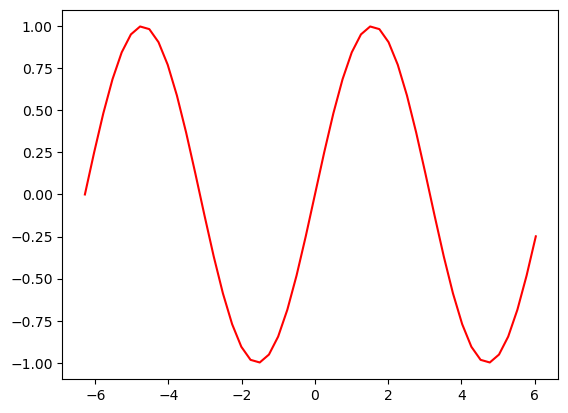

In [86]:
#常量都取出来，以便改动
EPOCH=1500 #迭代次数
MLP_LR=0.01 #学习率
left,right=-2,2 #区间
PI=math.pi #pai
NUM=50 #

# x,y 是普通sinx 的torch tensor
x =torch.tensor([(num * PI)  for num in numpy.arange(left, right,(right-left)/NUM)],dtype=torch.float32)#找点画图
print(x)
y = torch.sin(x)
plt.plot(x,y,color='red')
plt.show()

In [87]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Linear(1,20)
        self.layer2=torch.nn.Linear(20,20)
        self.layer3=torch.nn.Linear(20,1)

    def forward(self,x):
        x=self.layer1(x)
        x=torch.nn.functional.relu(x)

        x=self.layer2(x)
        x=torch.nn.functional.relu(x)

        x=self.layer3(x)

        return  x

In [90]:
mlp=MLP()

# input_x和labels是训练网络时候用的输入和标签。
input_x=x.reshape(-1, 1)#列数
labels=y.reshape(-1,1)
print(x)
print(y)
#input_x=input_x
#labels=labels

#训练mlp
mlp_optimizer=torch.optim.Adam(mlp.parameters(), lr=MLP_LR)#优化器
mlp_loss=[]
mlp_lr=[]
for epoch in range(EPOCH):
    if epoch % 10 == 0:  # 每迭代5次，更新一次学习率        
        for params in mlp_optimizer.param_groups:             
            # 遍历Optimizer中的每一组参数，将该组参数的学习率 * 0.9            
            params['lr'] *= 0.99            
            # params['weight_decay'] = 0.5  # 当然也可以修改其他属性
            
    mlp_lr.append(params['lr'])

    preds=mlp(input_x)#预测值
    loss=torch.nn.functional.mse_loss(preds,labels)
    
    mlp_optimizer.zero_grad()#梯度
    loss.backward()#计算梯度
    mlp_optimizer.step()#更新
    mlp_loss.append(loss.item())
    
    # print('1:   ',loss.item())
print(mlp_lr)

tensor([-6.2832e+00, -6.0319e+00, -5.7805e+00, -5.5292e+00, -5.2779e+00,
        -5.0265e+00, -4.7752e+00, -4.5239e+00, -4.2726e+00, -4.0212e+00,
        -3.7699e+00, -3.5186e+00, -3.2673e+00, -3.0159e+00, -2.7646e+00,
        -2.5133e+00, -2.2619e+00, -2.0106e+00, -1.7593e+00, -1.5080e+00,
        -1.2566e+00, -1.0053e+00, -7.5398e-01, -5.0265e-01, -2.5133e-01,
         5.5806e-15,  2.5133e-01,  5.0265e-01,  7.5398e-01,  1.0053e+00,
         1.2566e+00,  1.5080e+00,  1.7593e+00,  2.0106e+00,  2.2619e+00,
         2.5133e+00,  2.7646e+00,  3.0159e+00,  3.2673e+00,  3.5186e+00,
         3.7699e+00,  4.0212e+00,  4.2726e+00,  4.5239e+00,  4.7752e+00,
         5.0265e+00,  5.2779e+00,  5.5292e+00,  5.7805e+00,  6.0319e+00])
tensor([-1.7485e-07,  2.4869e-01,  4.8175e-01,  6.8455e-01,  8.4433e-01,
         9.5106e-01,  9.9803e-01,  9.8229e-01,  9.0483e-01,  7.7051e-01,
         5.8779e-01,  3.6812e-01,  1.2533e-01, -1.2533e-01, -3.6812e-01,
        -5.8779e-01, -7.7051e-01, -9.0483e-01, -9.

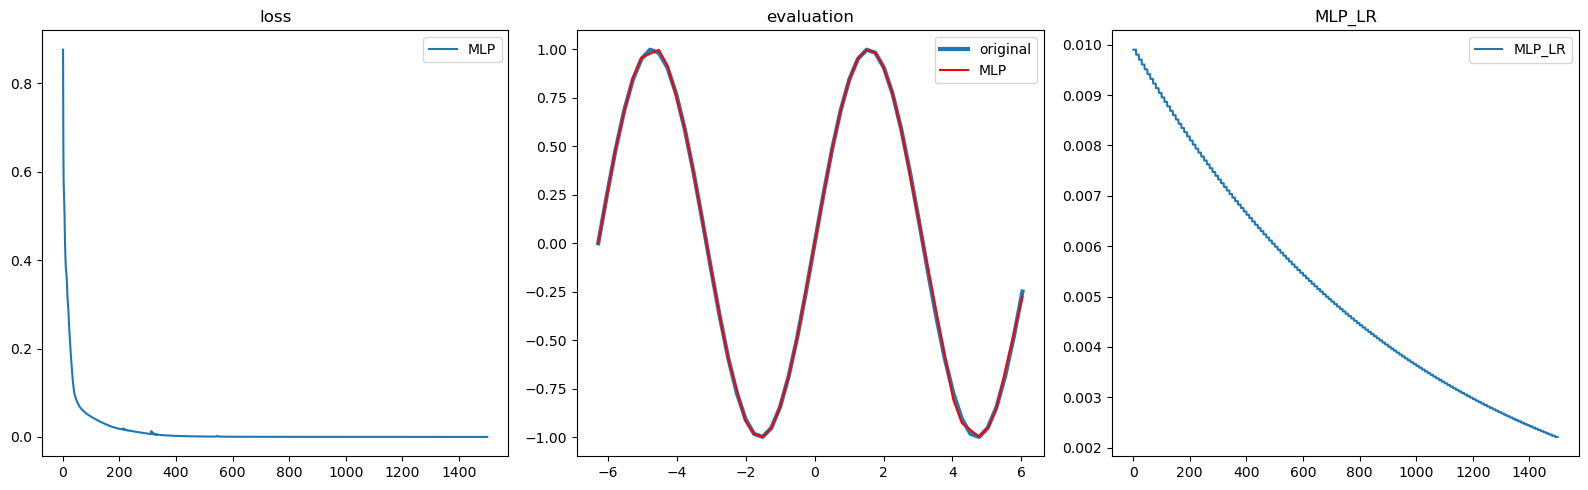

In [91]:

def PlotMLP(mlp,  input_x, x):
    # input_x 是输入网络的x。
    # sin_x 是列表，x的取值，一维数据、
    # 虽然他们的内容（不是维度）是一样的。可以print shape看一下。
    mlp_eval = mlp.eval()
    # mlp_y_np=[]
    # rnn_y_np=[]
    mlp_y = mlp_eval(input_x)
    # for i in range(mlp_y):
    #     mlp_y_np.append(i.detach().numpy())
    # for i in range(rnn_y):
    #     rnn_y_np.append(i.detach().numpy())
    mlp_y_np=mlp_y.cpu().detach().numpy()

    plt.figure(figsize=(16, 5))#设置图像的尺寸大小

    plt.subplot(131)#生成第一张子图，括号中的参数 121 表示这是一个一行两列的图像，在第一个位置（第 1 列）上绘制
    plt.plot([i + 1 for i in range(EPOCH)], mlp_loss, label='MLP')
    #绘制第一张子图，横轴是训练的 epoch 数量，纵轴是损失函数的值，颜色为默认颜色，标签为 'MLP'。其中 EPOCH 是训练轮数，表示训练过程中数据被多少次迭代。
    plt.title('loss')
    plt.legend()#显示第一张子图中线条的标签（'MLP'）

    plt.subplot(132)
    plt.plot(x, torch.sin(x), label="original", linewidth=3)
    plt.plot(x, [y[0] for y in mlp_y_np], label='MLP',color='red')
    plt.title('evaluation')
    plt.legend()

    plt.subplot(133)
    plt.plot([i + 1 for i in range(EPOCH)],mlp_lr, label="MLP_LR")
    plt.title('MLP_LR')
    plt.legend()

    plt.tight_layout()
    plt.show()
PlotMLP(mlp,input_x,x)

In [ ]:
#for name,para in mlp.named_parameters():
    #print(name,para.numel(),para.data.tolist())

In [ ]:
torch.save(mlp,'mlp.pt')